# Discrete Probability Distributions
------

1. [StatTreak Overview](http://stattrek.com/probability-distributions/probability-distribution.aspx)
2. [Common Probability Distributions: The Data Scientist’s Crib Sheet](http://blog.cloudera.com/blog/2015/12/common-probability-distributions-the-data-scientists-crib-sheet/)
3. [Scipy Distributions](https://docs.scipy.org/doc/scipy/reference/stats.html)
  -  [scipy distribution functions](https://docs.scipy.org/doc/scipy-0.14.0/reference/stats.html)
4. [R E-Tutorial Introduction to Stats](http://www.r-tutor.com/elementary-statistics/probability-distributions)
5. Truncated distributions.
  -  [How to sample truncated distributions](https://www.google.co.uk/search?client=firefox-b-ab&dcr=0&ei=1ShNWuXYIM3IwALT_orgCQ&q=truncated+distribution+python+tutorial&oq=truncated+distribution+python+tut&gs_l=psy-ab.3.0.33i21k1j33i160k1.14122.16124.0.17521.11.11.0.0.0.0.164.1137.6j5.11.0....0...1c.1.64.psy-ab..0.11.1129...0j0i22i30k1.0.chuX-eNenpo)
  
  
In this notebook we will demonstrate common probability distributions and there implementations in SciPy.

In [307]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Uniform
The simplest probability distribution occurs when all of the values of a random variable occur with equal probability. This probability distribution is called the uniform distribution.

The random variable X can assume k different values.

$$P(X = {x_k}) =1/k$$

A. Suppose a die is tossed. What is the probability that the die will land on 5? = pdf

B. What is the probability that the die will land on a number that is 5 or less? = cdf

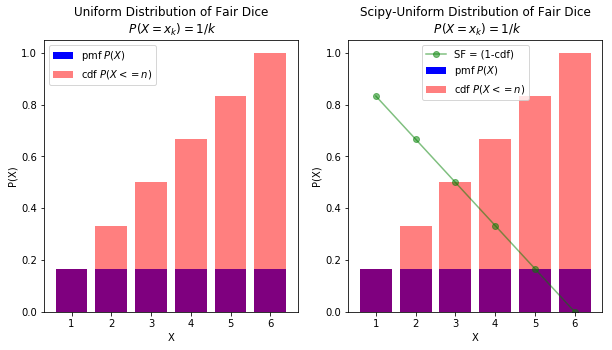

In [2]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=False, figsize=(10,5))

dice = np.arange(1,7,1)
k = len(dice)
pmf = [1/k for X in dice]
cdf = np.cumsum(pmf)

ax1.set_title('Uniform Distribution of Fair Dice\n $P(X = {x_k}) = 1/k$')
ax1.bar(dice, pmf, alpha=1, color='blue', label='pmf $P(X)$')
ax1.bar(dice, cdf, alpha=0.5, color='red', label='cdf $P(X<=n)$')

from scipy.stats import randint
low,high = 1,7
pmf = randint.pmf(dice,low,high)
cdf = randint.cdf(dice,low,high)
sf  = randint.sf(dice,low,high) # survival function is 1-cdf

ax2.set_title('Scipy-Uniform Distribution of Fair Dice\n $P(X = {x_k}) = 1/k$')
ax2.bar(dice, pmf, alpha=1, color='blue', label='pmf $P(X)$')
ax2.bar(dice, cdf, alpha=0.5, color='red', label='cdf $P(X<=n)$')
ax2.plot(dice, sf, alpha=0.5, color='green', label='SF = (1-cdf)',  marker='o')

for ax in [ax1,ax2]:
    ax.set_ylabel('P(X)')
    ax.set_xlabel('X')
    ax.legend();

## Bernoulli 
A distribution for random variables with a binary outcome, such as a coin toss.

$P(X) = p$

$P(Y) = 1-p$

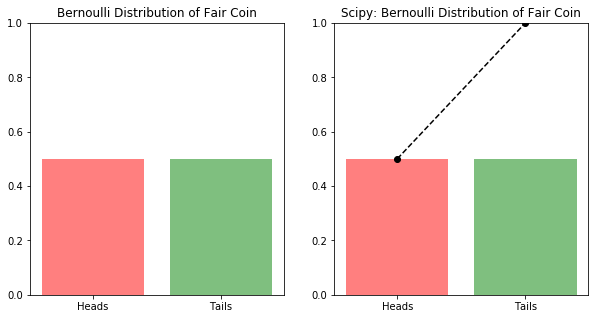

In [3]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=False, figsize=(10,5))


x = [0,1]                               
pHead = 0.5
pTail = 1.0 - pHead
ax1.set_title('Bernoulli Distribution of Fair Coin')
ax1.bar(x, [pHead, pTail], alpha=0.5, color=['red', 'green'])

from scipy.stats import bernoulli
pmf = bernoulli.pmf(x,pHead)
cdf = bernoulli.cdf(x,pHead)
ax2.set_title('Scipy: Bernoulli Distribution of Fair Coin')
ax2.bar(x, pmf, alpha=0.5, color=['red', 'green'])
ax2.plot(x, cdf, 'k--', marker='o')

for ax in [ax1,ax2]:
    ax.set_xticks(x)
    ax.set_xticklabels(['Heads', 'Tails'])
    ax.set_ylim(0,1)


## Binomial
[Examples](http://www.real-statistics.com/binomial-and-related-distributions/hypothesis-testing-binomial-distribution/)<br>
[1 & 2-tail tests](http://www.real-statistics.com/binomial-and-related-distributions/statistical-power-binomial-distribution/)<br>
A binomial distribution is given by the product of multiple bernoulli distributions - termed trials.

E.g. 1 If you toss a coin 20 times (trials), how many times may it come up heads?

E.g. 2 Imagine a bucket with equal numbers of red and blue marbles. Draw a marble, note its colour and place it back in the bucket. Repeat for a given number of times. The Binomial distribution describes how likely you are to have drawn $X$ red or blue marbles. 
##### Assumptions:
 - Each trial is independent.
 - The probability of sucess / failure is constant.

| |description|
|----|----|
|$x$|number of sucesses in a binomial experiment. 
|$n$|number of trials in a binomial experiment. 
|$P$|probability of sucess in a single trials.
|$Q$|probability of failure in a single trial $(1-P)$.
|$nl$|n factorial

$$b(x:n,P)$$ Binomial probability - the probability that an $n$ trial experiment yields exactly $x$ sucesses, when the probability of sucess in each trial is $P$.

For 30 trials with P = 0.35:
if >15 successes occur the coin is biased at 95%
if >17 sucesses occur the coin is biased at 99%

If the coin or "process" is proven to be biased,
it is sifnificantly different from the expectation based on $P$


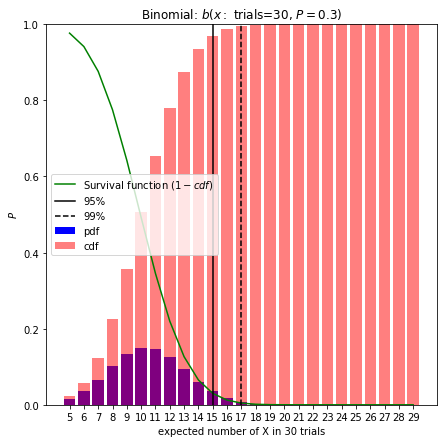

In [189]:
fig, ax1, = plt.subplots(1,1, figsize=(7,7))

from scipy.stats import binom
p = 0.35
n = 30

x = np.arange(binom.ppf(0.01, n, p), binom.ppf(1, n, p))
pmf = binom.pmf(x, n, p)
cdf = binom.cdf(x, n, p)
sf = binom.sf(x, n, p)

ax1.set_title('Binomial: $b(x:$ trials=$%s$, $P=%.1f)$' %(n, p))
ax1.bar(x, pmf, color='blue', label='pdf')
ax1.bar(x, cdf, color='red', alpha=0.5, label='cdf')
ax1.plot(x,sf, color='green', label='Survival function $(1-cdf)$')

ax1.plot([x[np.where((1.0 - cdf < 0.05) & (1.0 - cdf > 0.01))[0][0]]]*2, [0, 1],
        'k-', label='95%')

ax1.plot([x[np.where((1.0 - cdf) < 0.01)[0][0]]]*2, [0, 1],
        'k--', label='99%')

ax1.set_xticks(x)
ax1.set_ylim(0,1)
ax1.set_xlabel('expected number of X in %s trials' %n)
ax1.set_ylabel('$P$')
ax1.legend();

print('For %d trials with P = %.2f:\nif >%d successes occur the coin is biased at 95%%\nif >%d sucesses occur the coin is biased at 99%%'
      %(n,p,
        x[np.where((1.0 - cdf < 0.05) & (1.0 - cdf > 0.01))[0][0]],
        x[np.where((1.0 - cdf) < 0.01)[0][0]]))
print('\nIf the coin or "process" is proven to be biased,\nit is sifnificantly different from the expectation based on $P$')

## Hypogeometric Distribution

A hypergeometric experiment is a statistical experiment that has the following properties:

1. A sample of size n is randomly selected without replacement from a population of N items.
2. In the population, k items can be classified as successes, and N - k items can be classified as failures.

##### Params
$N$ The number of items in the population.<BR>
$k$ The number of items in the population that are classified as successes.<BR>
$n$ The number of items in the sample.<BR>
$x$ The number of items in the sample that are classified as successes.<BR>

##### Consider the following statistical experiment:
You have an urn of 10 marbles - 5 red and 5 green. You randomly select 2 marbles without replacement and count the number of red marbles you have selected. This would be a hypergeometric experiment.

##### Alternatively, consider:
Suppose we have a collection of 20 animals, of which 7 are dogs. Then if we want to know the probability of finding a given number of dogs if we choose at random 12 of the 20 animals, we can initialize a frozen distribution and plot the probability mass function:

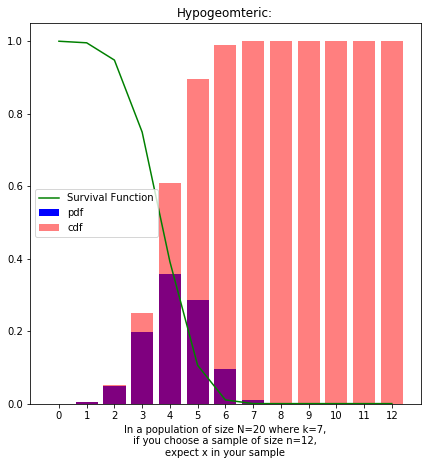

In [415]:
from scipy.stats import hypergeom
fig, ax1, = plt.subplots(1,1, figsize=(7,7))

N = 20
k = 7
n = 12

x = np.arange(0,n+1,1)
pmf = hypergeom.pmf(x, N, k, n)
cdf = hypergeom.cdf(x, N, k, n)
sf = hypergeom.sf(x, N, k, n)

ax1.set_title('Hypogeomteric:')
ax1.bar(x, pmf, color='blue', alpha=1, label='pdf')
ax1.bar(x, cdf, color='red', alpha=0.5, label='cdf')
ax1.plot(x, sf, color='green', label='Survival Function')

ax1.set_xticks(x)
ax1.set_xlabel('In a population of size N=%d where k=%d,\nif you choose a sample of size n=%d,\nexpect x in your sample' %(N,k,n))
ax1.legend();

## Multionomial Distribution

A multinomial experiment is a statistical experiment that has the following properties:

 - The experiment consists of n repeated trials.
 - Each trial has a discrete number of possible outcomes.
 - On any given trial, the probability that a particular outcome will occur is constant.
 - The trials are independent; that is, the outcome on one trial does not affect the outcome on other trials.

##### Note: 
A binomial experiment is a special case of a multinomial experiment. Here is the main difference. With a binomial experiment, each trial can result in two - and only two - possible outcomes. With a multinomial experiment, each trial can have two or more possible outcomes.


##### Consider the following statistical experiment: 
You toss two dice three times, and record the outcome on each toss. This is a multinomial experiment because:

 - The experiment consists of repeated trials. We toss the dice three times.
 - Each trial can result in a discrete number of outcomes - 2 through 12.
 - The probability of any outcome is constant; it does not change from one toss to the next.
 - The trials are independent; that is, getting a particular outcome on one trial does not affect the outcome on other trials.
 
##### Consider this:
Suppose a card is drawn randomly from an ordinary deck of 52 playing cards, and then put back in the deck.<BR>
This exercise is repeated $n$=5 times e.g. 5 cards are drawn.<BR>
What is the probability of drawing 1 spade, 1 heart, 1 diamond, and 2 clubs? 

In [272]:
from scipy.stats import multinomial
n = 5
probabilities = [0.25, 0.25, 0.25, 0.25]
choices = [1,1,1,2]
print(sum(choices) == n)

multinomial.pmf(choices, n=n, p=probabilities)

True


0.058593750000000035

## Negative Binomial Distribution
[Example](http://www.statisticshowto.com/negative-binomial-experiment/)<BR>
It’s the number of failures until r successes have occurred, not just 1. It’s therefore parameterized also by r. 

The negative binomial is similar to the binomial with two differences.
 - The number of trials, n is not fixed.
 - Instead, the random variable $X$ = the number of trials required to observe r successes.

##### Example: 
1. Take a standard deck of 52 cards, shuffle them, and choose a card. 
2. Replace the card and repeat until you have drawn two aces ($r$ = 2).
3. Probability of an Ace = 4/52.
4. $X$ is the number of draws needed to draw two aces. 
5. As the number of trials isn’t fixed (i.e. you stop when you draw the second ace), this makes it a negative binomial distribution.

        cdf       pmf  trials
0  0.012580  0.004957     4.0
1  0.018985  0.006406     5.0
2  0.026870  0.007884     6.0


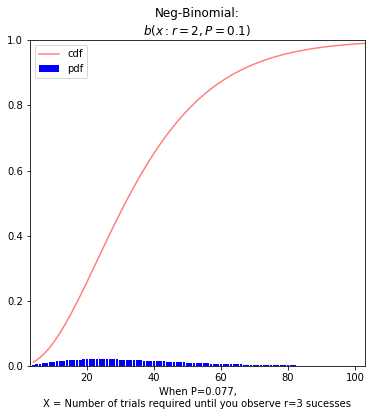

In [414]:
fig, ax1, = plt.subplots(1,1, figsize=(6,6))
from scipy.stats import nbinom

p = 4/52
r = 3

x = np.arange(nbinom.ppf(0.01,r,p), nbinom.ppf(0.99,r,p),1)

pmf = nbinom.pmf(x, r, p)
cdf = nbinom.cdf(x, r, p)
sf = nbinom.sf(x, r, p)

ax1.set_title('Neg-Binomial:\n$b(x:r=%s, P=%.1f)$' %(n, p))
ax1.bar(x, pmf, color='blue', label='pdf')
ax1.plot(x, cdf, color='red', alpha=0.5, label='cdf')
#ax1.plot(x,sf, color='green', label='Survival function $(1-cdf)$')

ax1.set_ylim(0,1)
ax1.set_xlim(r,max(x))
ax1.set_xlabel('When P=%.3f,\nX = Number of trials required until you observe r=%d sucesses' %(p,r));
ax1.legend();
    
print(pd.DataFrame({'trials':x, 'pmf':pmf, 'cdf':cdf})[:3])

# Geomertric Distribution

The geometric distribution is a special case of the negative binomial distribution. It deals with the number of trials required for a single success. Thus, the geometric distribution is negative binomial distribution where the number of successes (r) is equal to 1.

##### Example:
A geometric distribution would be tossing a coin until it lands on heads. We might ask:<BR>
What is the probability that the first head occurs on the third flip?<BR>That probability is referred to as a geometric probability and is denoted by g(x; P).

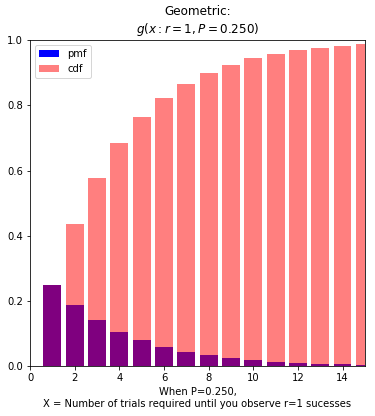

In [449]:
fig, ax1, = plt.subplots(1,1, figsize=(6,6))
from scipy.stats import geom

p = 0.25
r = 1

x = np.arange(1, nbinom.ppf(0.99,r,p),1)
pmf = geom.pmf(x, p)
cdf = geom.cdf(x, p)

ax1.set_title('Geometric:\n$g(x:r=%s, P=%.3f)$' %(r, p))
ax1.bar(x, pmf, color='blue', label='pmf')
ax1.bar(x, cdf, color='red', alpha=0.5, label='cdf')

ax1.set_ylim(0,1)
ax1.set_xlim(r-1,max(x))
ax1.set_xlabel('When P=%.3f,\nX = Number of trials required until you observe r=%d sucesses' %(p,r));
ax1.legend();

## Poisson Distribution [wiki](https://en.wikipedia.org/wiki/Poisson_distribution#Assumptions:_When_is_the_Poisson_distribution_an_appropriate_model?)
The Poisson distribution is popular for modelling the number of times an event occurs in an interval of time or space. e.g:
1. The number of meteorites greater than 1 meter diameter that strike Earth in a year.
2. The number of patients arriving in an emergency room between 10 and 11 pm

The Poisson distribution is an appropriate model if the following assumptions are true.

 - k is the number of times an event occurs in an interval and k can take values 0, 1, 2, ….
 - The occurrence of one event does not affect the probability that a second event will occur. That is, events occur independently.
 - The rate at which events occur is constant. The rate cannot be higher in some intervals and lower in other intervals.
 - Two events cannot occur at exactly the same instant; instead, at each very small sub-interval exactly one event either occurs or does not occur.<BR>
 And.........
 - The probability of an event in a small sub-interval is proportional to the length of the sub-interval.<BR>
    Or
 - The actual probability distribution is given by a binomial distribution and the number of trials is sufficiently bigger than the number of successes one is asking about (see Related distributions).


The Poisson distribution is the probability distribution of:<BR>
 - $X$ independent event occurrences within an interval.<BR> 
 - $λ$ is the mean occurrence of events per interval.
 - The probability of having $X$ occurrences within a given interval is the possion distribution: 


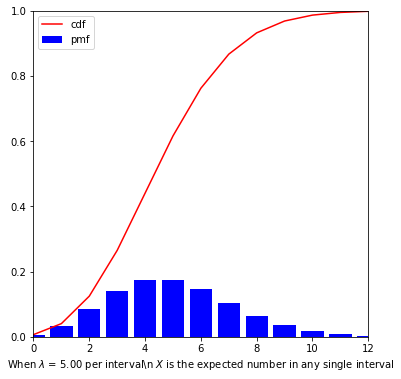

In [471]:
fig, ax1, = plt.subplots(1,1, figsize=(6,6))
from scipy.stats import poisson

mu = 5 # the rate of occurence per interval

x = np.arange(0, poisson.ppf(0.999,mu),1)
pmf = poisson.pmf(x,mu)
cdf = poisson.cdf(x,mu)

ax1.bar(x, pmf, color='blue', label='pmf')
ax1.plot(x, cdf, color='red', label='cdf')

ax1.set_ylim(0,1)
ax1.set_xlim(0,max(x))
ax1.set_xlabel(r'When $\lambda$ = %.2f per interval\n $X$ is the expected number in any single interval' %mu);
ax1.legend();

## Eponential Distribution